In [1]:
import pandas as pd
import os
import glob 
import matplotlib.pyplot as plt

## convert and append all the csv files

In [2]:
csv_files=os.listdir('./salessampledata')
#initialize an empty df
sales_df=pd.DataFrame()
for file in csv_files:
    initial_df=pd.read_csv('./salessampledata/'+file)
    sales_df=pd.concat([sales_df,initial_df])
#make sure to add the filepath in line 5 to file var

# clean the data 

In [3]:

#sales_df=pd.DataFrame
sales_df=sales_df.dropna(subset=['Order Date'])
sales_df.dropna(how='any')
sales_df['Order Date'].fillna(0)
sales_df=sales_df[sales_df['Order Date'].str[0:2]!='Or']


In [4]:
#convert col to resp datatypes
sales_df['Quantity Ordered']=pd.to_numeric(sales_df['Quantity Ordered'])
sales_df['Price Each']=pd.to_numeric(sales_df['Price Each'])

In [5]:
sales_df['Month']=sales_df['Order Date'].str[0:2]
sales_df['Month']=sales_df['Month'].astype('int32')
sales_df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8


### An alternative for  the above cell is

In [6]:
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8


## adding a sales column

In [7]:
sales_df['Sales']=sales_df['Quantity Ordered']*sales_df['Price Each']

In [8]:
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68


In [9]:
#sales made each month

In [10]:
totalsales=sales_df.groupby('Month').sum()

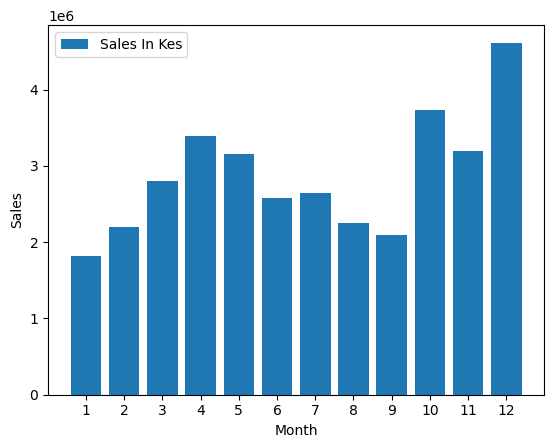

In [11]:
month=range(1,13)
plt.bar(month,totalsales['Sales'])
plt.xticks(month)
plt.legend(['Sales In Kes'])
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

## Find the highest sales city

In [12]:
#create and a city col and obtain city details from address
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]
sales_df['City']=sales_df['Purchase Address'].apply(lambda x:get_city(x)+ ' ' +get_state(x))
#alternatively: sales_df['City']=sales_df['Purchase Address'].apply(lambda x:x.split(',')[1:2])
sales_df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle WA
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas TX
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00,Portland OR
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68,Los Angeles CA
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68,New York City NY


In [13]:
city_sales=sales_df.groupby('City').sum()
city_sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
City,,,,,,,,
Atlanta GA,2366852366992367032367142367172367192367442367...,Apple Airpods HeadphonesAA Batteries (4-pack)B...,16602,2779908.20,08/23/19 19:2908/20/19 21:0708/08/19 06:0908/3...,"238 Highland St, Atlanta, GA 30301763 Hill St,...",104794,2795498.58
Austin TX,2367052367102367492367522367732367742367952368...,AA Batteries (4-pack)Macbook Pro LaptopAAA Bat...,11153,1809873.61,08/11/19 22:2108/04/19 02:4608/30/19 20:1308/2...,"27 North St, Austin, TX 73301654 Chestnut St, ...",69829,1819581.75
Boston MA,2366812366912367122367262367352367392367412367...,AA Batteries (4-pack)USB-C Charging CableAA Ba...,22528,3637409.77,08/26/19 20:5208/23/19 07:3408/30/19 07:1408/2...,"295 1st St, Boston, MA 02215916 Meadow St, Bos...",141112,3661642.01
Dallas TX,2366712366832366862366982367022367112367202367...,Bose SoundSport Headphones27in FHD MonitorAAA ...,16730,2752627.82,08/15/19 15:1108/31/19 15:4708/15/19 19:1308/0...,"492 Ridge St, Dallas, TX 75001196 West St, Dal...",104620,2767975.40
Los Angeles CA,2366732366762366792366882367002367072367362367...,AA Batteries (4-pack)34in Ultrawide MonitorMac...,33289,5421435.23,08/29/19 20:5908/04/19 19:5208/07/19 15:4308/0...,"631 2nd St, Los Angeles, CA 90001470 Cherry St...",208325,5452570.80
New York City NY,2366742366842366872366942366962367232367272367...,AA Batteries (4-pack)Lightning Charging CableU...,27932,4635370.83,08/15/19 19:5308/09/19 16:5008/23/19 12:5408/1...,"736 14th St, New York City, NY 10001669 12th S...",175741,4664317.43
Portland ME,2367282367512368152368662368912369002369662372...,ThinkPad Laptop27in 4K Gaming Monitor27in FHD ...,2750,447189.25,08/10/19 11:2108/03/19 09:1808/28/19 17:5508/1...,"526 North St, Portland, ME 04101534 Washington...",17144,449758.27
Portland OR,2366722366822366932367152367682367722368422368...,iPhoneAA Batteries (4-pack)27in 4K Gaming Moni...,11303,1860558.22,08/06/19 14:4008/19/19 12:4008/12/19 21:5708/2...,"149 7th St, Portland, OR 97035118 Johnson St, ...",70621,1870732.34
San Francisco CA,2366752366772366782366802366892366902366922366...,Wired Headphones20in MonitorWired HeadphonesLG...,50239,8211461.74,08/02/19 23:5408/13/19 07:1608/25/19 20:1108/0...,"470 Hill St, San Francisco, CA 94016918 6th St...",315520,8262203.91


Text(0, 0.5, 'Sales in Kes')

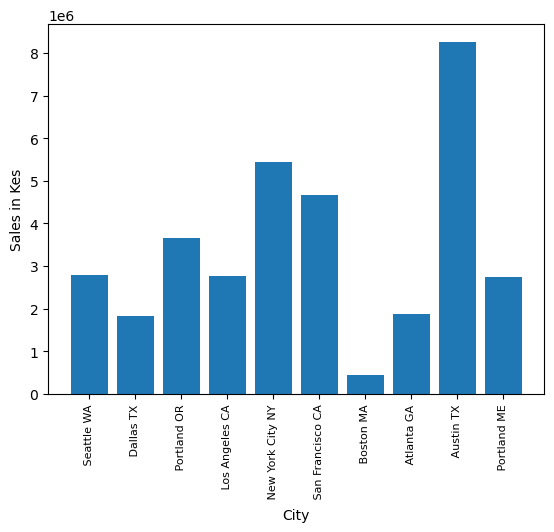

In [19]:
city=sales_df['City'].unique()
plt.bar(city,city_sales['Sales'])
plt.xticks(city,rotation='vertical',size=8)
plt.xlabel('City')
plt.ylabel('Sales in Kes')